In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data=pd.DataFrame(df)

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
features=data.drop('Class',axis=1)
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [8]:
target=data['Class']  # class is indicate 0
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
target.value_counts() # 1=fraud # 0=is not fraud

0    284315
1       492
Name: Class, dtype: int64

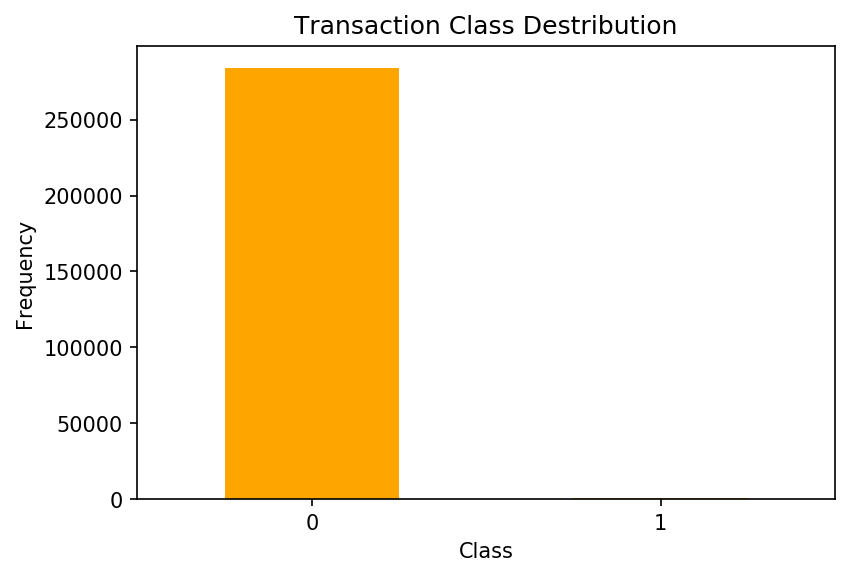

In [10]:
plt.figure(dpi=150)
count_Classes=pd.value_counts(data['Class'],sort=True)
count_Classes.plot(kind='bar',rot=0,color='orange')
plt.title('Transaction Class Destribution')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [11]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25)

In [12]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
231233,146663.0,2.243962,-1.402678,-0.893704,-1.635961,-1.214037,-0.526998,-1.120121,-0.145686,-1.481404,...,-0.365829,-0.142262,0.070404,0.187621,-0.345988,-0.208959,-0.197408,0.010454,-0.058435,29.90
124599,77356.0,-1.230425,0.214243,0.370094,-2.048322,1.650928,3.756340,-0.743430,1.615384,0.446052,...,0.158317,-0.183381,-0.639365,-0.057200,1.057128,0.099558,0.813793,0.135626,0.052806,34.66
180506,124568.0,-0.528475,0.544013,0.063448,-1.088388,1.442218,-0.202518,1.179143,-0.365645,-0.075844,...,-0.200758,0.293877,1.109003,-0.343998,-1.121953,0.012592,-0.176625,-0.227880,-0.087608,16.02
241027,150851.0,-0.313091,1.044288,-0.092356,-0.541739,0.049295,-1.104672,0.608172,0.283861,-0.110461,...,-0.187148,-0.217126,-0.616090,0.152568,-0.040683,-0.501428,0.148027,0.118664,0.032807,8.99
22153,32066.0,-0.823513,-0.616008,0.672373,-3.431029,-1.925364,0.671123,2.360997,-0.500403,-0.571459,...,-0.384575,-0.594067,-1.035658,0.375535,-0.346430,-0.388410,-0.558903,0.009809,-0.222271,459.78


In [13]:
y_train.head()

231233    0
124599    0
180506    0
241027    0
22153     0
Name: Class, dtype: int64

In [14]:
model=LogisticRegression()
model.fit(x_train,y_train)

D:\Users\V130\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
pred=model.predict(x_test)

In [16]:
pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [17]:
y_test[:5]

17754     0
169187    0
211862    0
155298    0
15503     0
Name: Class, dtype: int64

In [18]:
print(f"Confusion Matrix \n\n",confusion_matrix(y_test,pred))

Confusion Matrix 

 [[71039    38]
 [   33    92]]


In [19]:
print(accuracy_score(y_test,pred)*100)

99.90028369989608


In [20]:
print(f"Classification Report\n\n",classification_report(y_test,pred))

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.71      0.74      0.72       125

    accuracy                           1.00     71202
   macro avg       0.85      0.87      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [21]:
cnf=pd.DataFrame(confusion_matrix(y_test,pred),columns=['Not Fraud','Fraud'], index=['Not Fraud','Fraud'])

In [22]:
cnf

,Not Fraud,Fraud
Not Fraud,71039,38
Fraud,33,92


In [23]:
import seaborn as sns

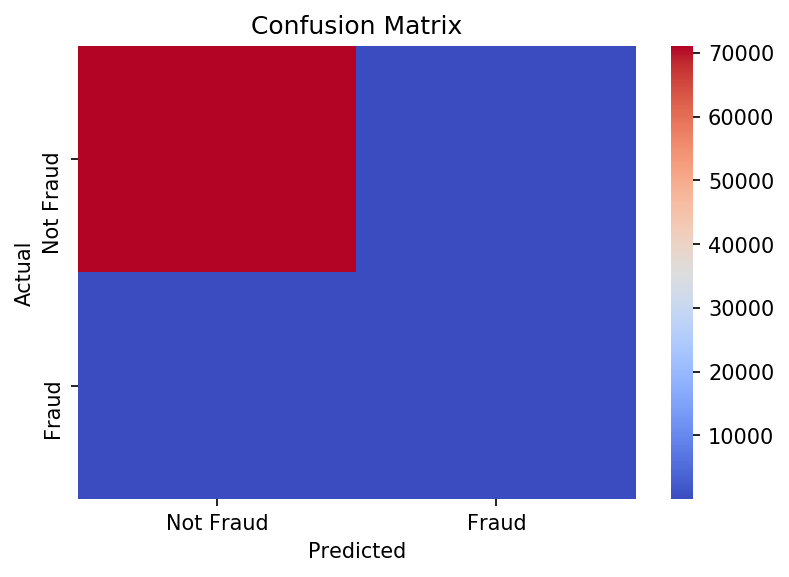

In [24]:
plt.figure(dpi=150)
plt.title("Confusion Matrix")
sns.heatmap(cnf, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
f=data[['Time','Amount']]
f.head()

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(f,target,test_size=0.20)
X_train.head()

,Time,Amount
47903,43408.0,2.75
262526,160516.0,3454.92
174473,121927.0,401.85
206741,136347.0,23.60
86957,61475.0,434.27


In [27]:
Y_train[:5]

47903     0
262526    0
174473    0
206741    0
86957     0
Name: Class, dtype: int64

In [28]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred1 = model1.predict(X_test)
pred1[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [125]:
model1.predict(f)[0]

0

In [126]:
type(model1.predict(f)[0])

numpy.int64

In [30]:
Y_test[:5]

23792     0
163105    0
4517      0
166119    0
74570     0
Name: Class, dtype: int64

In [31]:
import pickle
fp=open('cc_fraud_df.pk1','wb')
pickle.dump(model,fp)
fp.close()

In [ ]:
import tkinter as tk
import PIL.Image
import PIL.ImageTk

with open('cc_fraud_df.pk1', 'rb') as fp:
    model = pickle.load(fp)
    fp.close()
    
root=tk.Tk()
root.title('Fraud Trasanction Detector')

canvas = tk.Canvas(root, height=600, width=900)

im = PIL.Image.open("credit_card_fraud-100537848-large.jpg")
photo = PIL.ImageTk.PhotoImage(im)
background_label = tk.Label(root, image=photo)
background_label.place(relx=0, rely=0, relwidth=1, relheight=1)

canvas.pack()


time=tk.IntVar()
amount=tk.DoubleVar()

def clear():
    time.set('')
    amount.set('')
clear()

l=tk.Label(root,text='Check Your Transaction', bd=2,relief='sunken')
l.config(bg='black',fg='blue', font=('Courier', 20, 'bold'))
l.place(relx=0.5, rely=0.02, relwidth=0.5, relheight=0.1, anchor='n')

l1 = tk.Label(root, text="Enter Amount"+" : ")
l1.config(bg='white', fg='black', font=('Courier', 12, 'bold'))
l1.place(relx=0.45, rely=0.34, relwidth=0.17, relheight=0.07)

e1 = tk.Entry(root,textvariable=amount,bg='white',fg='black',font=('Courier', 15))
e1.place(relx=0.6, rely=0.34, relwidth=0.10, relheight=0.07)

l2 = tk.Label(root, text="Enter Time"+" : ")
l2.config(bg='white', fg='black', font=('Courier', 12, 'bold'))
l2.place(relx=0.65, rely=0.21, relwidth=0.16, relheight=0.07)

e2 = tk.Entry(root,textvariable=time,bg='white',fg='black',font=('Courier', 15))
e2.place(relx=0.8, rely=0.21, relwidth=0.10, relheight=0.07)

b1 = tk.Button(root, text='Submit', command=lambda : predict())
b1.config(bg='green', fg='yellow', font=('Courier', 12, 'bold'),border=5)
b1.place(relx=0.72, rely=0.47, relwidth=0.2, relheight=0.07)

def predict():
    t = time.get()
    a = amount.get()
    features = [ [ t, a] ]
    clear()
    m = model1.predict(f)[0]
    if m==0:
        text ="No Fraud Seems to be at this Transaction."
    else:
        text ="It seems to have a Fraud Transaction"
        
    label = tk.Label(root,text=text,relief='sunken')
    label.config(font=('Courier', 18))
    label.place(relx=0.1, rely=0.9, relwidth=0.8, relheight=0.065)

root.mainloop()